In [3]:
import numpy as np
import pandas as pd
import pynapple as nap
import scipy.ndimage
import matplotlib.pyplot as plt
import seaborn as sns
import requests, math, os
import tqdm

custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", palette="colorblind", font_scale=1.5, rc=custom_params)

In [4]:
import pandas as pd
pd.set_option('display.max_rows', None)
np.set_printoptions(threshold=np.inf)
## unit11: unit_num = 8, ch = 13
filepath = r"S:\Sachuriga/nwb/63383_2024-07-10_15-37-51_A_phy_k_manual.nwb"
data = nap.load_file(filepath)
data

63383_2024-07-10_15-37-51_A_phy_k_manual
┍━━━━━━━━━━━━━━━━━━┯━━━━━━━━━━┑
│ Keys             │ Type     │
┝━━━━━━━━━━━━━━━━━━┿━━━━━━━━━━┥
│ units            │ TsGroup  │
│ lfp_raw          │ TsdFrame │
│ lfp_car          │ TsdFrame │
│ Tail4_cords      │ TsdFrame │
│ Tail3_cords      │ TsdFrame │
│ Tail2_cords      │ TsdFrame │
│ Tail1_cords      │ TsdFrame │
│ XY               │ TsdFrame │
│ Snout_cords      │ TsdFrame │
│ Right_ear_cords  │ TsdFrame │
│ XY_mid_brain     │ TsdFrame │
│ Neck_cords       │ TsdFrame │
│ MD               │ TsdFrame │
│ Mid_brain_cords  │ TsdFrame │
│ Left_ear_cords   │ TsdFrame │
│ lfp_times        │ Tsd      │
│ BD               │ Tsd      │
│ Back4_cords      │ TsdFrame │
│ Back3_cords      │ TsdFrame │
│ Back2_cords      │ TsdFrame │
│ Back1_cords      │ TsdFrame │
│ ElectricalSeries │ TsdFrame │
┕━━━━━━━━━━━━━━━━━━┷━━━━━━━━━━┙

In [5]:
spikes = data["units"]  # Get spike timings
epochs =wake_ep = data["XY_mid_brain"].time_support # Get the behavioural epochs (in this case, sleep and wakefulness)
angle = data["BD"]

c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:145: UserWarning: Metadata name 'num_negative_peaks.1' contains a special character, and cannot be accessed as an attribute. Use 'get_info()' or key indexing to access metadata.
  warnings.warn(
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:145: UserWarning: Metadata name 'recovery_slope.1' contains a special character, and cannot be accessed as an attribute. Use 'get_info()' or key indexing to access metadata.
  warnings.warn(
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:145: UserWarning: Metadata name 'cluster_id.21' contains a special character, and cannot be accessed as an attribute. Use 'get_info()' or key indexing to access metadata.
  warnings.warn(
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:145: UserWarning: Meta

In [8]:
tuning_curves = nap.compute_1d_tuning_curves(
    group=spikes, 
    feature=angle, 
    nb_bins=61, 
    ep=epochs,
    minmax=(0, 2 * np.pi)
    )

c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:145: UserWarning: Metadata name 'num_negative_peaks.1' contains a special character, and cannot be accessed as an attribute. Use 'get_info()' or key indexing to access metadata.
  warnings.warn(
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:145: UserWarning: Metadata name 'recovery_slope.1' contains a special character, and cannot be accessed as an attribute. Use 'get_info()' or key indexing to access metadata.
  warnings.warn(
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:145: UserWarning: Metadata name 'cluster_id.21' contains a special character, and cannot be accessed as an attribute. Use 'get_info()' or key indexing to access metadata.
  warnings.warn(
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:145: UserWarning: Meta

In [9]:
tuning_curves

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0.051502,0.709598,0.000000,1.703035,1.466502,0.425759,0.047307,0.662291,0.047307,0.094613,2.270713,...,8.846321,1.939568,0.047307,5.487557,1.324583,24.646700,11.211647,5.960622,2.365326,36.000267
0.154505,0.802455,0.000000,1.955985,1.554757,0.651995,0.000000,0.501535,0.000000,0.200614,1.003069,...,8.275321,0.651995,0.050153,5.366420,3.510742,24.525042,10.933454,6.168875,2.206752,38.317243
0.257508,0.256645,0.042774,0.128322,1.497096,0.256645,0.000000,0.470516,0.000000,0.171097,1.283225,...,7.571027,0.513290,0.042774,4.491287,1.625418,25.108435,10.265800,6.758318,2.823095,39.309458
0.360511,0.147610,0.000000,0.147610,1.586811,0.885662,0.295221,1.254688,0.110708,0.073805,1.217785,...,7.269809,0.442831,0.258318,4.834238,1.660616,22.842698,13.211124,4.760433,4.575920,38.895322
0.463514,0.096067,0.000000,0.048034,0.960672,1.008706,0.144101,0.864605,0.000000,0.000000,1.200841,...,7.541278,0.432303,0.048034,6.532572,0.720504,24.785348,13.353346,5.523866,6.196337,37.129989
0.566517,0.154648,0.000000,0.000000,1.185638,1.288737,0.360846,0.206198,0.000000,0.515495,1.494935,...,8.351016,0.257747,0.051549,4.227058,0.979440,25.362346,12.217228,3.402266,3.556914,41.342686
0.669520,0.207913,0.051978,0.103956,1.507367,2.910777,0.207913,0.259891,0.000000,0.155935,1.663301,...,8.264529,0.207913,0.207913,5.925511,0.727694,24.013914,10.655525,5.093861,3.846385,41.062754
0.772523,0.000000,0.000000,0.478498,1.483343,2.105389,0.143549,0.239249,0.239249,1.052695,1.196244,...,9.235004,0.143549,0.382798,5.694121,0.622047,24.738326,11.723191,3.923680,5.885520,38.997554
0.875526,0.221008,0.055252,0.165756,0.884031,4.420155,0.442015,1.160291,0.110504,0.442015,1.547054,...,9.503332,0.055252,0.110504,6.464476,1.768062,25.526393,12.321181,3.812383,4.309651,41.770461
0.978529,0.057277,0.000000,0.171832,0.859158,3.092969,0.572772,0.229109,0.000000,0.801881,1.374653,...,9.164353,0.114554,0.057277,5.212226,1.603762,27.321226,12.200044,4.410345,3.207523,41.411418


In [10]:
pref_ang = tuning_curves.idxmax()

In [11]:
norm = plt.Normalize()  # Normalizes data into the range [0,1]
color = plt.cm.hsv(norm([i / (2 * np.pi) for i in pref_ang.values]))  # Assigns a colour in the HSV colourmap for each value of preferred angle
color = pd.DataFrame(index=pref_ang.index, data = color, columns = ['r', 'g', 'b', 'a'])

In [12]:
from scipy.ndimage import gaussian_filter1d
def smoothAngularTuningCurves(tuning_curves, sigma=2):

    tmp = np.concatenate((tuning_curves.values, tuning_curves.values, tuning_curves.values))
    tmp = gaussian_filter1d(tmp, sigma=sigma, axis=0)

    return pd.DataFrame(index = tuning_curves.index,
        data = tmp[tuning_curves.shape[0]:tuning_curves.shape[0]*2], 
        columns = tuning_curves.columns
        )

In [23]:
smoothcurves = smoothAngularTuningCurves(tuning_curves, sigma=3)
smoothcurves[0]

0.051502    0.384147
0.154505    0.370743
0.257508    0.337799
0.360511    0.292944
0.463514    0.245379
0.566517    0.202790
0.669520    0.169570
0.772523    0.146772
0.875526    0.133173
0.978529    0.126394
1.081532    0.123564
1.184535    0.121706
1.287538    0.118252
1.390541    0.111762
1.493544    0.102491
1.596547    0.092331
1.699550    0.084167
1.802553    0.080936
1.905556    0.084914
2.008559    0.097364
2.111562    0.118453
2.214565    0.147283
2.317568    0.181954
2.420571    0.219641
2.523574    0.256855
2.626577    0.289842
2.729581    0.315096
2.832584    0.329923
2.935587    0.332858
3.038590    0.323944
3.141593    0.304689
3.244596    0.277781
3.347599    0.246551
3.450602    0.214362
3.553605    0.184124
3.656608    0.158044
3.759611    0.137494
3.862614    0.122893
3.965617    0.113578
4.068620    0.107881
4.171623    0.103656
4.274626    0.099112
4.377629    0.093567
4.480632    0.087629
4.583635    0.082804
4.686638    0.080763
4.789641    0.082577
4.892644    0

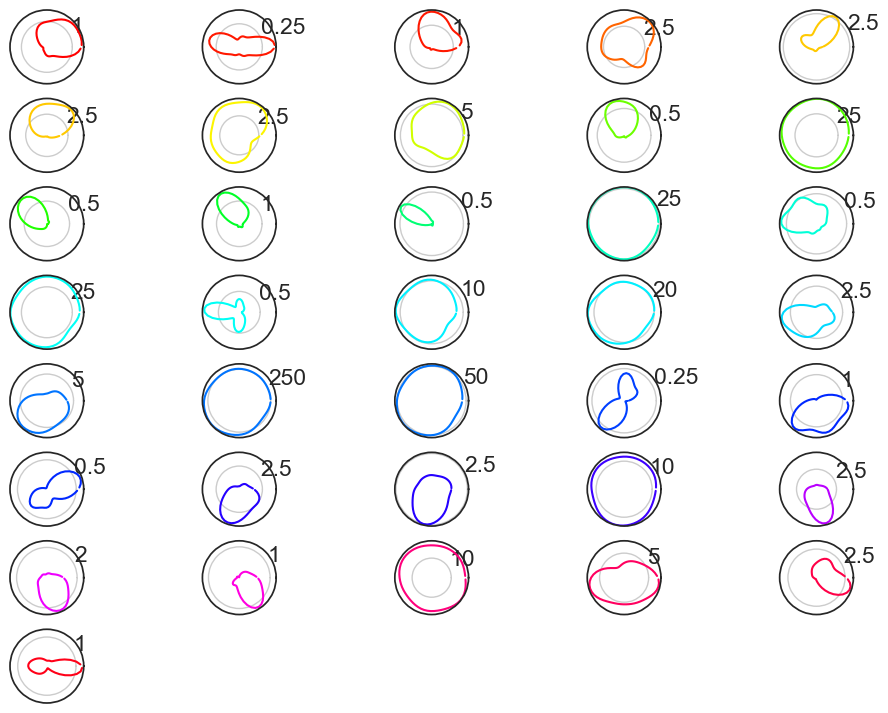

In [15]:
plt.figure(figsize=(12, 9))
for i, n in enumerate(pref_ang.sort_values().index.values):
    plt.subplot(8, 5, i + 1, projection='polar')  # Plot the curves in 8 rows and 4 columns
    plt.plot(
        smoothcurves[n], color=color.loc[n]
    )  # Colour of the curves determined by preferred angle    
    plt.xticks([])
plt.show()

In [16]:
decoded, proba_feature = nap.decode_1d(
    tuning_curves=tuning_curves,
    group=spikes,
    ep=epochs,
    bin_size=0.1,  # second
    feature=angle,
)

c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:145: UserWarning: Metadata name 'num_negative_peaks.1' contains a special character, and cannot be accessed as an attribute. Use 'get_info()' or key indexing to access metadata.
  warnings.warn(
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:145: UserWarning: Metadata name 'recovery_slope.1' contains a special character, and cannot be accessed as an attribute. Use 'get_info()' or key indexing to access metadata.
  warnings.warn(
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:145: UserWarning: Metadata name 'cluster_id.21' contains a special character, and cannot be accessed as an attribute. Use 'get_info()' or key indexing to access metadata.
  warnings.warn(
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:145: UserWarning: Meta

Text(0, 0.5, 'Neurons')

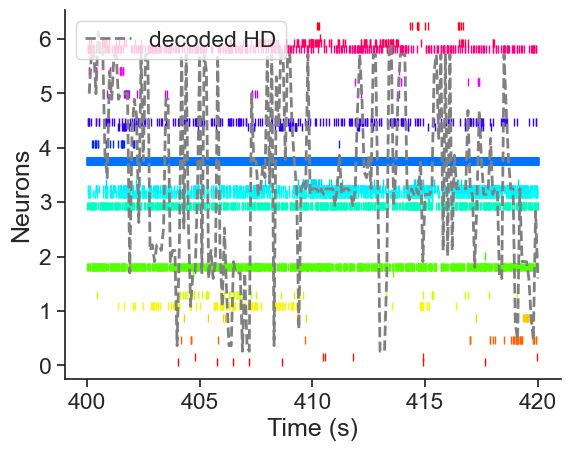

In [20]:
ep = nap.IntervalSet(
    start=400, end=420
)  # Select an arbitrary interval for plotting

plt.figure()
plt.rc("font", size=12)
for i, n in enumerate(spikes.keys()):
    plt.plot(
        spikes[n].restrict(ep).fillna(pref_ang[n]), "|", color=color.loc[n]
    )  # raster plot for each cell
plt.plot(
    decoded.restrict(ep), "--", color="grey", linewidth=2, label="decoded HD"
)  # decoded HD
plt.legend(loc="upper left")
plt.xlabel("Time (s)")
plt.ylabel("Neurons")

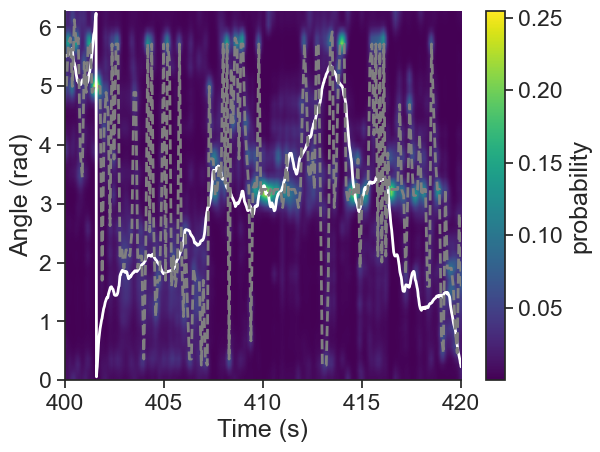

In [21]:
smoothed = scipy.ndimage.gaussian_filter(
    proba_feature, 1
)  # Smoothening the probability distribution

# Create a DataFrame with the smoothed distribution
p_feature = pd.DataFrame(
    index=proba_feature.index.values,
    columns=proba_feature.columns.values,
    data=smoothed,
)
p_feature = nap.TsdFrame(p_feature)  # Make it a Pynapple TsdFrame

plt.figure()
plt.plot(
    angle.restrict(ep), "w", linewidth=2, label="actual HD", zorder=1
)  # Actual HD, in white
plt.plot(
    decoded.restrict(ep), "--", color="grey", linewidth=2, label="decoded HD", zorder=1
)  # Decoded HD, in grey

# Plot the smoothed probability distribution
plt.imshow(
    np.transpose(p_feature.restrict(ep).values),
    aspect="auto",
    interpolation="bilinear",
    extent=[ep["start"][0], ep["end"][0], 0, 2 * np.pi],
    origin="lower",
    cmap="viridis",
)

plt.xlabel("Time (s)")  # X-axis is time in seconds
plt.ylabel("Angle (rad)")  # Y-axis is the angle in radian
plt.colorbar(label="probability")